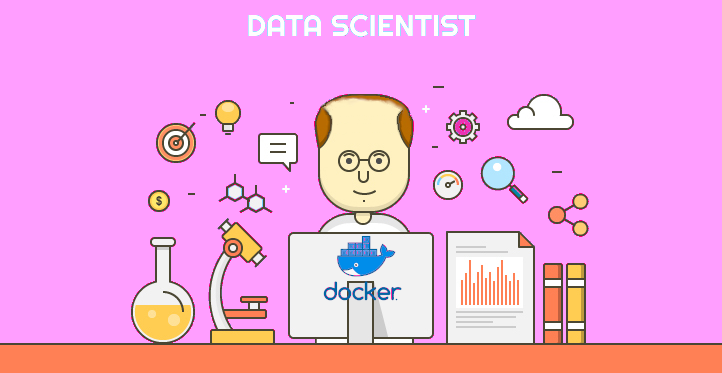

# Curva ROC e Valor AUC

ROC (Receiver Operating Characteristic) é uma curva de probabilidade. É criada ao traçar a taxa verdadeiro-positivo contra a taxa de falsos-positivos. Ou seja, numero de vezes que o classificador acertou a predição contra o número de vezes que o classificador errou a predição.

O AUC representa a área do ROC, considerado como o grau ou medida de separabilidade. Quanto maior seu valor, melhor é o modelo em prever ou (por exemplo) em distinguir entre pacientes com e sem uma determinada doença.

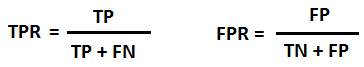

In [1]:
import pandas as pd
from sklearn import metrics                           # Metricas para calcular accuracy score
from sklearn.model_selection import train_test_split  # Separa dados de treinamento e teste
from sklearn.datasets import load_breast_cancer       # Carrega o dataset Breast Cancer    
import matplotlib.pyplot as plt                       # Plotagem de gráficos
from sklearn.model_selection import cross_val_score   # Obter uma média de Scores
from sklearn.datasets import make_classification      # Dados arbitrários

from sklearn.linear_model import LogisticRegression   # Modelos utilizados
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

## Exemplo simples

In [6]:
# Gerar os dados
X, y = make_classification(n_samples = 10000, n_features=10, n_classes = 2, flip_y = 0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

In [7]:
# Usar um modelo qualquer
model = LogisticRegression(solver='liblinear', penalty='l2', C=0.1)
model.fit(X_train, y_train)
print('Acurácia', model.score(X_test, y_test))

Acurácia 0.7045


In [8]:
# Cálculo da curva ROC e da AUC:
y_prob = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
auroc = float(format(metrics.roc_auc_score(y_test, y_prob), '.8f'))
print(auroc)

0.72026937


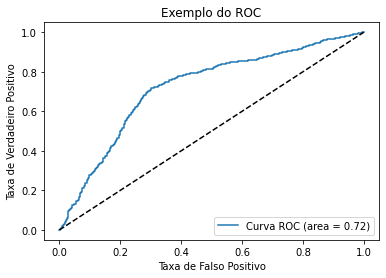

In [9]:
# Plotar os Dados
plt.plot(fpr, tpr, label='Curva ROC (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Exemplo do ROC')
plt.legend(loc="lower right")
plt.show()

O ROC possui dois parâmetros:

* Taxa de verdadeiro positivo (True Positive Rate), que é dado por true positives / (true positives + false negatives). Essa taxa também é conhecida como sensibilidade, recordação ou probabilidade de detecção (sensitivity, recall ou probability of detection)
* Taxa de falso positivo (False Positive Rate), que é dado por false positives / (false positives + true negatives). A taxa de falsos positivos também é conhecida como probabilidade de alarme falso ( fall-out or probability of false alarm) e pode ser calculada como (1 — Specificity). A Specificity (especificidade) também é conhecida como true negative rate. Por exemplo, quantas pessoas sem uma doença (true negative) foi classificadas como sadias.

AUC resume a curva ROC num único valor que é o calculo da “área sob a curva”.

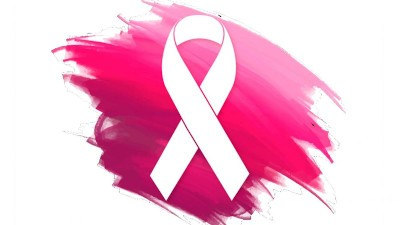

## Estudo sobre o Câncer de Mama

Agora vamos tratar de dados mais sérios, a Scikit-Learn nos oferece uma base sobre o estudo em pacientes com classificações de tipos de Câncer de Mama entre malígno e benígno.

In [10]:
# Carregar a Base
cancer = load_breast_cancer()
print(cancer.feature_names)
print(cancer.target_names)
print(type(cancer))
# Separar os Dados
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = .25)
print(len(X_train), len(X_test))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
<class 'sklearn.utils.Bunch'>
426 143


## Retornar a Acurácia dos Modelos

In [11]:
def score(mdl, Xtrn, Xtst, ytrn, ytst):
    mdl.fit(Xtrn, ytrn)
    return float(format(mdl.score(Xtst, ytst), '.8f'))

In [12]:
def auroc(ytst, yprob):
    fpr, tpr, _ = metrics.roc_curve(ytst, yprob)
    auc = float(format(metrics.roc_auc_score(ytst, yprob), '.8f'))
    return fpr, tpr, auc

## Regressão Logística

In [13]:
clfLR = LogisticRegression(max_iter=10000)
print("Acurácia", score(clfLR, X_train, X_test, y_train, y_test))

Acurácia 0.95804196


In [16]:
y_probLR = clfLR.predict_proba(X_test)[::,1]
fprLR, tprLR, aucLR = auroc(y_test,  y_probLR)
print("AUC", aucLR)

AUC 0.99651067


## Árvore de Decisão

In [14]:
clfDT = DecisionTreeClassifier()
print("Acurácia", score(clfDT, X_train, X_test, y_train, y_test))

Acurácia 0.92307692


In [17]:
y_probDT = clfDT.predict_proba(X_test)[::,1]
fprDT, tprDT, aucDT = auroc(y_test,  y_probDT)
print("AUC", aucDT)

AUC 0.92087438


## Floresta Aleatória

In [15]:
clfRF = RandomForestClassifier(n_estimators=100)
print("Acurácia", score(clfRF, X_train, X_test, y_train, y_test))

Acurácia 0.95104895


In [18]:
y_probRF = clfRF.predict_proba(X_test)[::,1]
fprRF, tprRF, aucRF = auroc(y_test,  y_probRF)
print("AUC", aucRF)

AUC 0.99343186


## Plotar a curva ROC

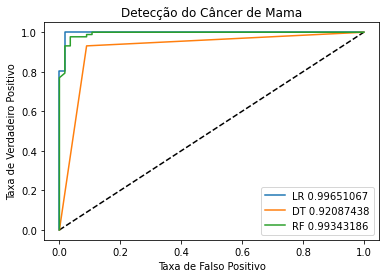

In [19]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprLR,tprLR,label="LR " + str(aucLR))
plt.plot(fprDT,tprDT,label="DT " + str(aucDT))
plt.plot(fprRF,tprRF,label="RF " + str(aucRF))
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Detecção do Câncer de Mama')
plt.legend(loc="lower right")
plt.show()

## Estudo sobre a Diabetes em Mulheres

In [20]:
colnames = ['gest', 'glic', 'sang', 'skin', 'insul', 'mass', 'familia', 'idade', 'conf']
filename = '../bases/pima-indians-diabetes.data.csv'
df = pd.read_csv(filename, names=colnames)
print(df.shape)
df.head()

(768, 9)


,gest,glic,sang,skin,insul,mass,familia,idade,conf
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df = df.drop(columns=['sang'],axis=1)
df = df.drop(columns=['insul'],axis=1)
df = df.drop(columns=['gest'],axis=1)
df = df.drop(columns=['skin'],axis=1)
df.head()

,glic,mass,familia,idade,conf
0,148,33.6,0.627,50,1
1,85,26.6,0.351,31,0
2,183,23.3,0.672,32,1
3,89,28.1,0.167,21,0
4,137,43.1,2.288,33,1


In [22]:
conf = df['conf']
df = df.drop(columns=['conf'],axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df, conf, test_size = .25)

In [24]:
# Aplicar Regressão Logística
clfRL = LogisticRegression(max_iter=1000)
print("Acurácia RL:", score(clfRL, X_train, X_test, y_train, y_test))
y_probRL = clfRL.predict_proba(X_test)[::,1]
fprRL, tprRL, aucRL = auroc(y_test,  y_probRL)
print("AUC RL", aucRL)

# Aplicar Floresta Aleatória
clfRF = RandomForestClassifier(n_estimators=1000)
print("Acurácia RF:", score(clfRF, X_train, X_test, y_train, y_test))
y_probRF = clfRF.predict_proba(X_test)[::,1]
fprRF, tprRF, aucRF = auroc(y_test,  y_probRF)
print("AUC RF:", aucRF)

Acurácia RL: 0.765625
AUC RL 0.82608696
Acurácia RF: 0.734375
AUC RF: 0.8203275


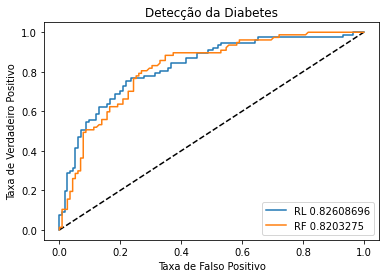

In [25]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprRL,tprRL,label="RL " + str(aucRL))
plt.plot(fprRF,tprRF,label="RF " + str(aucRF))
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Detecção da Diabetes')
plt.legend(loc="lower right")
plt.show()